# Uses of Random walkers

We can study various aspects of a graph, such as its connectivity, centrality, and community structure. For instance, after running a random walk for a certain number of steps, the nodes with the most walkers might be the most central or important nodes in the network.

### Example-1

Let's take an example of a large scale network of subreddits where each node represents a subreddit and edges represent common Redditors. The weight of an edge can represent the number of common Redditors between two subreddits. We'll simulate such a graph and perform a random walk to find the most significant subreddits. Please note that the graph is simulated and does not represent the actual subreddit connections.

**In this example**:

- A large scale graph is simulated using the nx.powerlaw_cluster_graph function, which creates a graph with powerlaw degree distribution and approximate average clustering. This could mimic the nature of subreddit connections.
- Random weights are assigned to the edges to simulate the number of common Redditors between two subreddits.
- The random_walk function is used to perform a random walk on the graph.
- The top 10 subreddits are determined based on the final number of walkers, and printed out. These might be the most significant or central subreddits in the network.
- The final distribution of walkers is visualized using a color map.
- Please note that due to the random nature of the graph and the random walk, the results will be different each time you run the code.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

from random_walkers import random_walk # save the random_walkers.py file in same directory


In [4]:
# Create a simulated large scale subreddit network
G = nx.powerlaw_cluster_graph(1000, 3, 0.6)
weights = {(u, v): np.random.randint(1, 100) for u, v in G.edges()}

# Initialize walkers uniformly distributed
W = {node: 100 for node in G.nodes()}

# Perform the random walk
stop = 100
W_final = random_walk(G, stop, W, p_stay=0.3, weights=weights)

# Find the 10 subreddits with the most walkers
top_subreddits = sorted(W_final, key=W_final.get, reverse=True)[:10]
print('Top 10 subreddits:', top_subreddits)



Top 10 subreddits: [8, 1, 3, 0, 16, 24, 2, 32, 10, 35]


C:\Users\ACHARYA Kishor\AppData\Local\Temp\ipykernel_5992\2383079550.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(W_final.values()), vmax=max(W_final.values())), cmap=plt.cm.Greens))


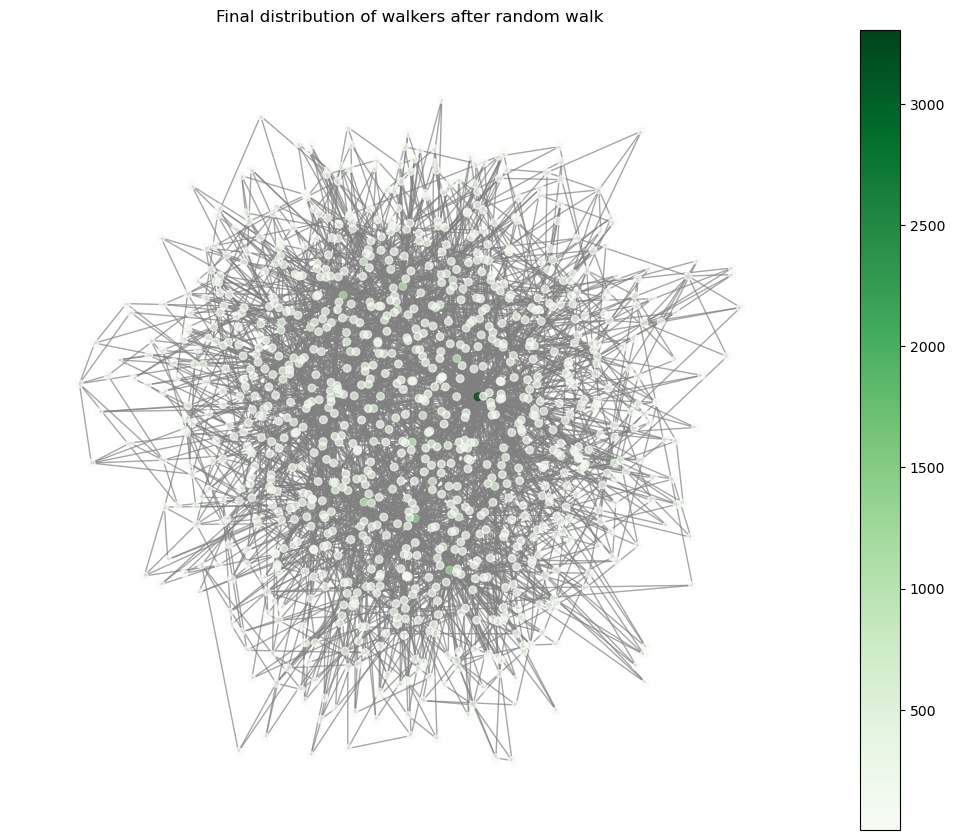

In [7]:
# Visualize the final distribution of walkers
plt.figure(figsize=(10, 8))

# Use a spring layout to distribute the nodes
pos = nx.spring_layout(G)

node_colors = [W_final[node] for node in G.nodes()]

# Reduce node size and add edge transparency
nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.Greens, node_size=30, edge_color='gray', alpha=0.7)

plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(W_final.values()), vmax=max(W_final.values())), cmap=plt.cm.Greens))
plt.title('Final distribution of walkers after random walk')
plt.show()

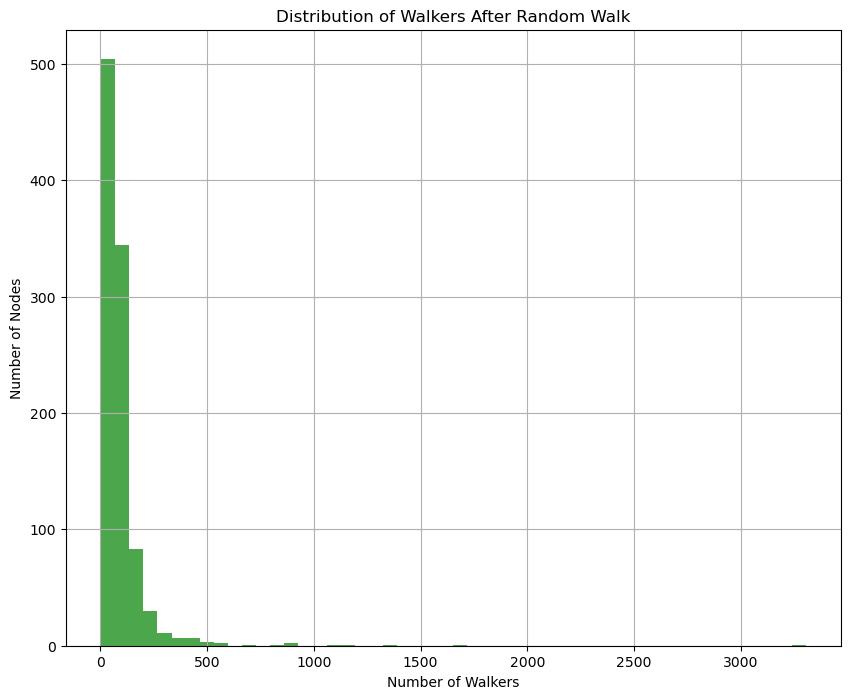

In [8]:
import matplotlib.pyplot as plt

# Plot the distribution of walkers
plt.figure(figsize=(10, 8))
plt.hist(W_final.values(), bins=50, color='green', alpha=0.7)
plt.xlabel('Number of Walkers')
plt.ylabel('Number of Nodes')
plt.title('Distribution of Walkers After Random Walk')
plt.grid(True)
plt.show()


This code creates a histogram where each bin represents a range of number of walkers, and the height of each bin represents the number of nodes that ended up with a number of walkers within that range. This way, we can see not only the most common number of walkers at a node, but also the overall distribution of walkers.

C:\Users\ACHARYA Kishor\AppData\Local\Temp\ipykernel_5992\1972404125.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(W_final.values()), vmax=max(W_final.values())), cmap=plt.cm.Greens))


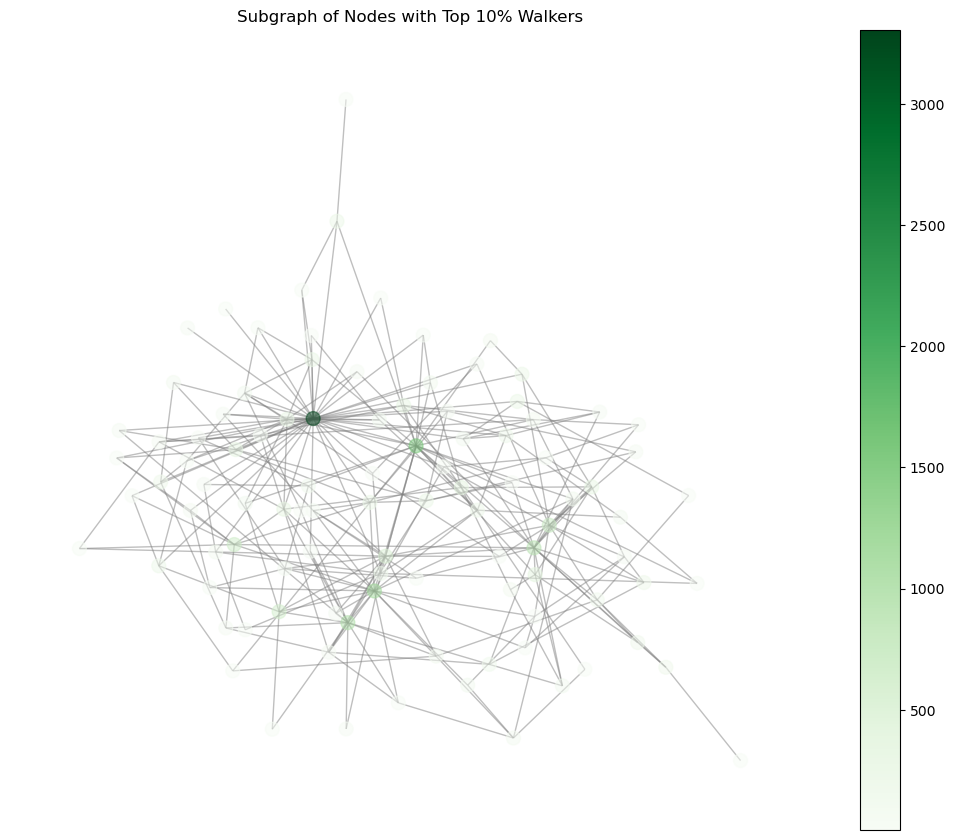

In [9]:
# Get the nodes with the top 10% walkers
top_nodes = sorted(W_final, key=W_final.get, reverse=True)[:int(0.1 * len(W_final))]

# Create a subgraph from the top nodes
H = G.subgraph(top_nodes)

# Visualize the subgraph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(H)
node_colors = [W_final[node] for node in H.nodes()]
nx.draw(H, pos, node_color=node_colors, cmap=plt.cm.Greens, node_size=100, edge_color='gray', alpha=0.5)
plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(W_final.values()), vmax=max(W_final.values())), cmap=plt.cm.Greens))
plt.title('Subgraph of Nodes with Top 10% Walkers')
plt.show()


This code first determines the nodes with the top 10% walkers, then creates a subgraph H from those nodes, and finally visualizes the subgraph in a similar way as before. This visualization could help us better understand the structure of the graph among the nodes with the most walkers.